# <center>Breast Cancer Prediction </center>


A proper introduction gives visitors the context needed to understand the project. This is also where you should introduce the dataset and explain the challenge you're solving.

- What is the main challenge or topic your project addresses?
- Which dataset are you using and how did you acquire it? ( Also summarize the types of features and variables available in the dataset. )
- What are the most important findings from your project? ( Preview your results and draw visitors in. )
- How does your project address the challenge? ( Which data science and machine learning techniques do you use? )
- Who are you and why is this project important or valuable to you? ( What is your motivation for doing this project? )

## Introduction
This capestone project predicts the breast canser from the features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  

### Attribute Information
More information abou the data can be found at [data source](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). In summary:

1. 1) ID number 
1. 2) Diagnosis (M = malignant, B = benign) 
1. 3-32) Ten real-valued features are computed for each cell nucleus: 
a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

###  Methodology & Main Findings 
This is a typicle classification machine learning problem. Regression, random forest, gradient boosted decision tree, and support vector machine algorithms were evaculated and compared in the project.  Random forest achieved the highest AUROC of 0.99, which means that random forest classifier has a 99% chance of distinguishing between a positive class observation and a negative class one. 



## Library Imports

In [3]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.set_option('precision', 3)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

import pickle

## Exploratory Analysis 

Exploratory analysis is all about scouting ahead. Make sure you can answer the following questions for yourself. Review the Cornerstone Projects if you need a refresher on the code and visualizations.

### Basic Information
- How many observations and features does your dataset have?
- Do you understand each feature intuitively?
- Do the values for each feature make sense? Are they on the right scale?
- Do you anticipate issues with missing data?
- Were your features read in as the correct datatype?


In [67]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077,NaN


In [3]:
df.dtypes

id                         int64  
diagnosis                  object 
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690e+02,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,5.690e+02,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,0.0
mean,3.037e+07,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,0.405,1.217,2.866,40.337,0.007,0.025,0.032,0.012,0.021,3.795e-03,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,NaN
std,1.250e+08,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,0.277,0.552,2.022,45.491,0.003,0.018,0.030,0.006,0.008,2.646e-03,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,NaN
min,8.670e+03,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,0.112,0.360,0.757,6.802,0.002,0.002,0.000,0.000,0.008,8.948e-04,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,NaN
25%,8.692e+05,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,0.232,0.834,1.606,17.850,0.005,0.013,0.015,0.008,0.015,2.248e-03,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,NaN
50%,9.060e+05,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,0.324,1.108,2.287,24.530,0.006,0.020,0.026,0.011,0.019,3.187e-03,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,NaN
75%,8.813e+06,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,0.479,1.474,3.357,45.190,0.008,0.032,0.042,0.015,0.023,4.558e-03,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,NaN
max,9.113e+08,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,2.873,4.885,21.980,542.200,0.031,0.135,0.396,0.053,0.079,2.984e-02,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,NaN


In [11]:
df['Unnamed: 32'].unique()

array([nan])

In [68]:
df.drop('Unnamed: 32', 1, inplace=True )

In [13]:
df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


In [14]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Note:** Data basic information matches the data introduction. There are no missing data in each feature. However, the additional feature "Unmaned: 32" is an empty column and was removed.

### Distributions
- Do each of the distributions make intuitive sense to you?
- Do you anticipate any issues with outliers or sparse data?
- Are there any surprising distributions you should take a closer look at?
- Do the summary statistics confirm what you’ve seen from the charts?

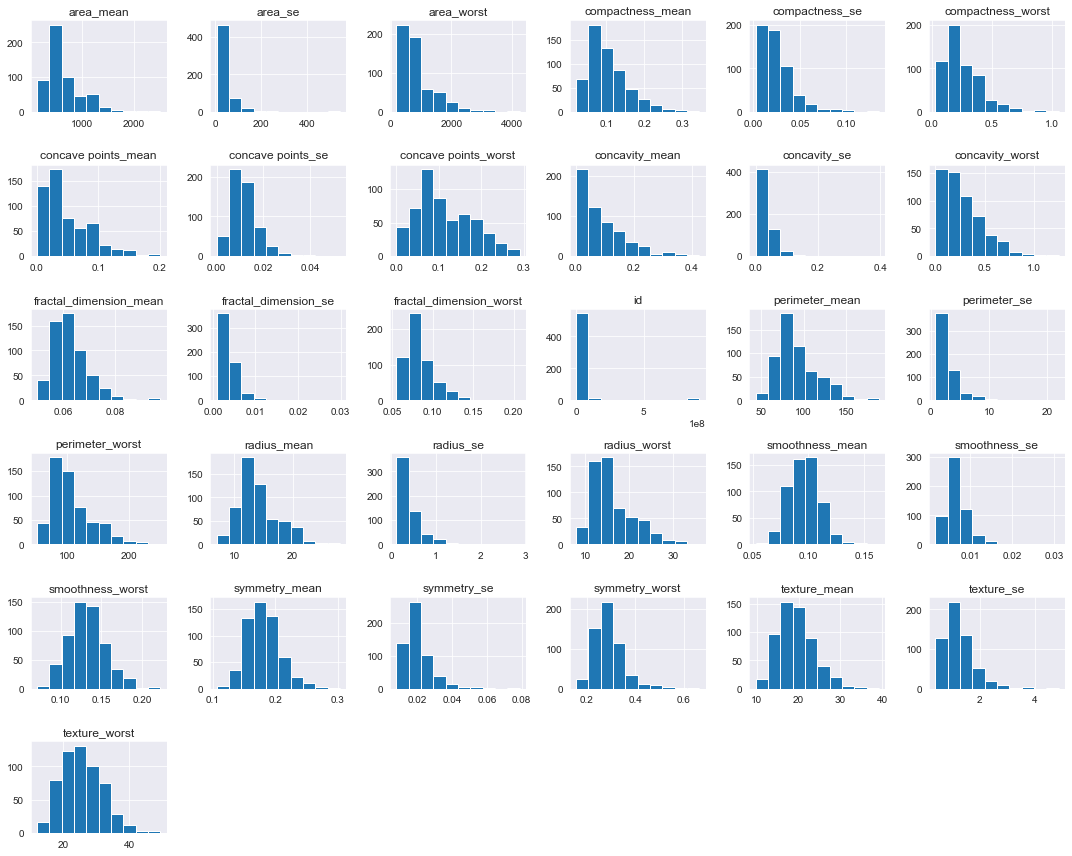

In [15]:
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

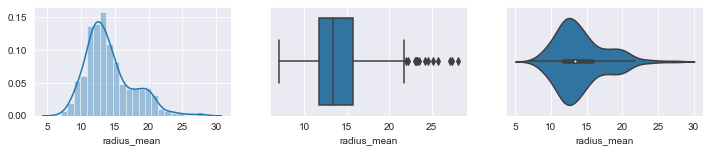

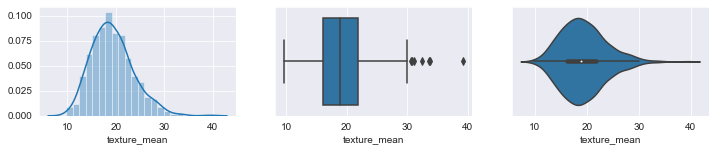

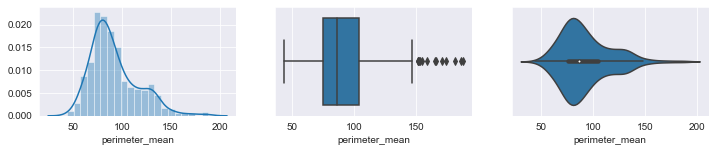

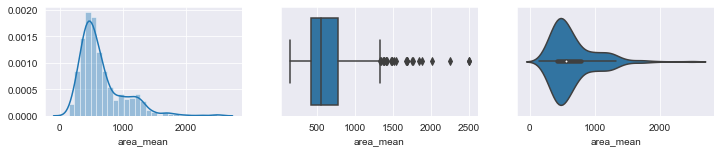

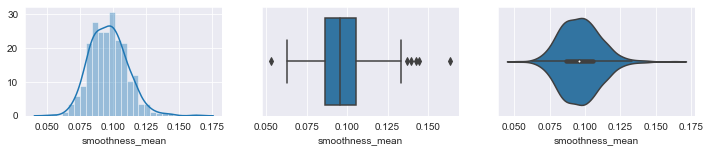

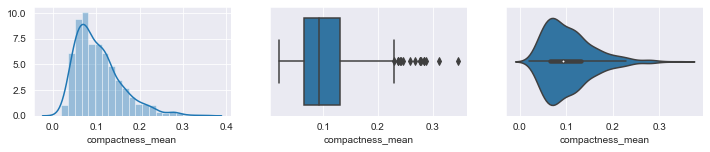

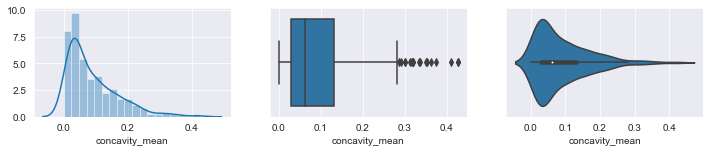

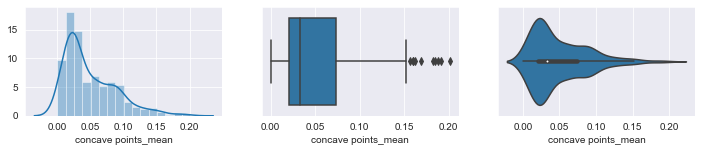

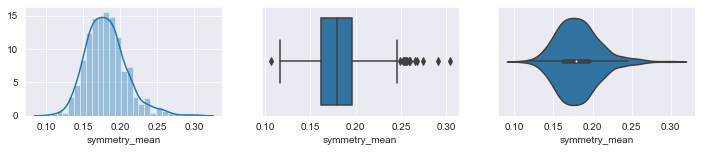

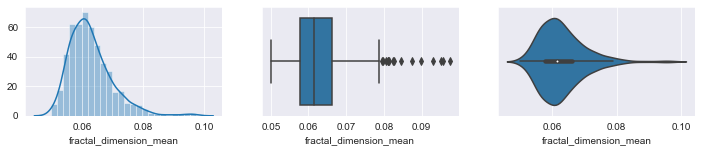

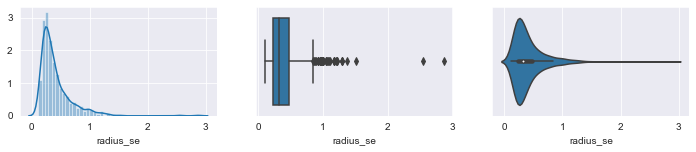

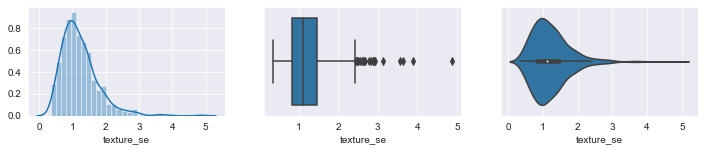

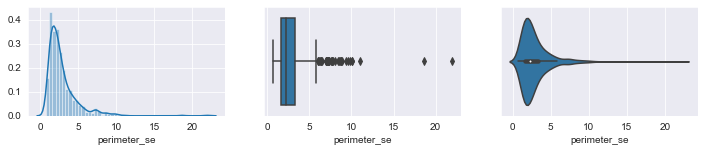

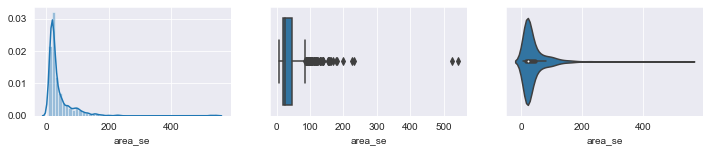

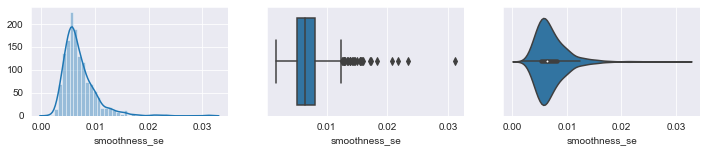

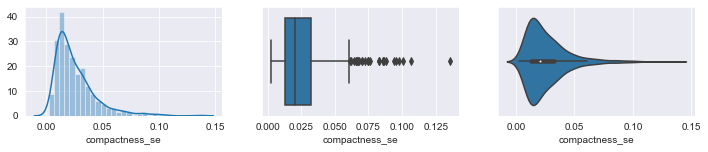

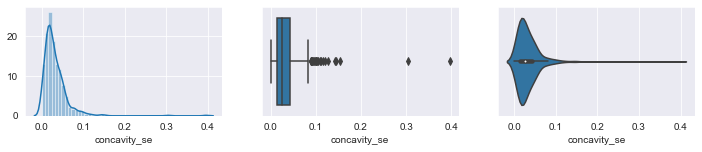

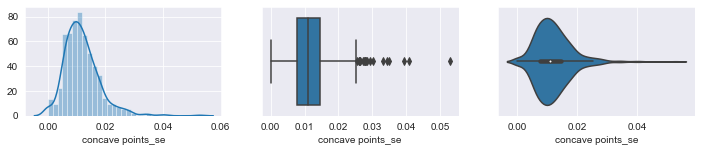

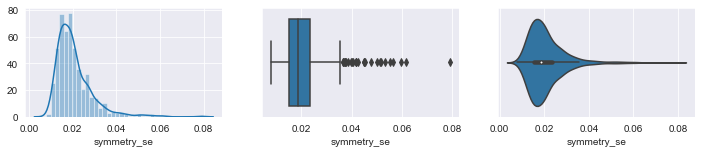

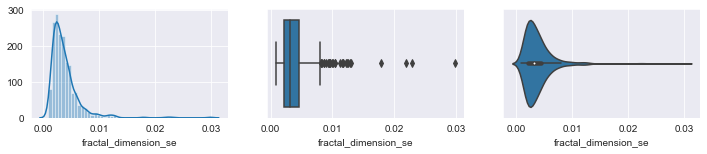

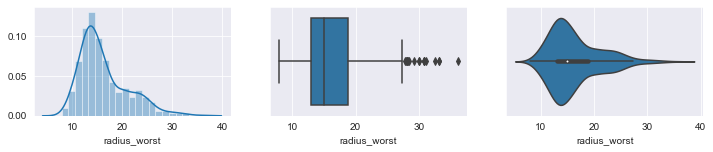

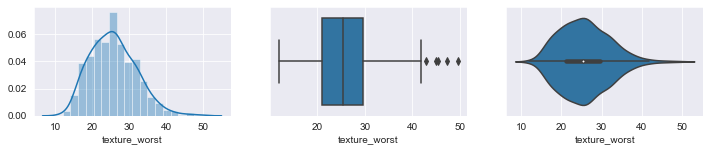

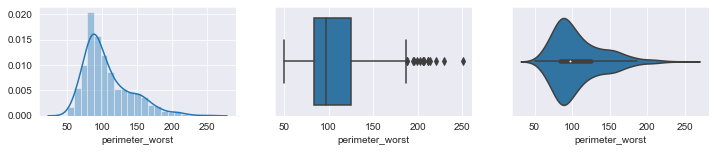

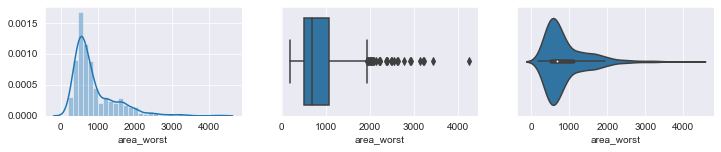

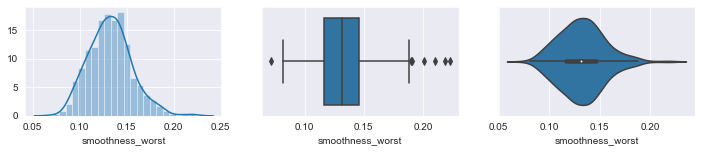

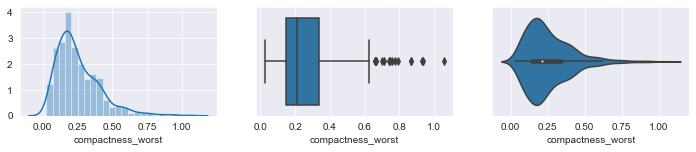

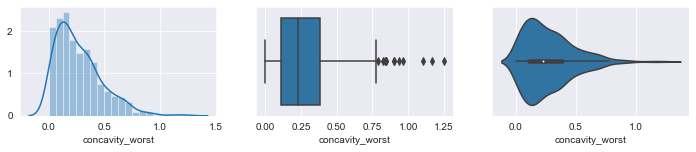

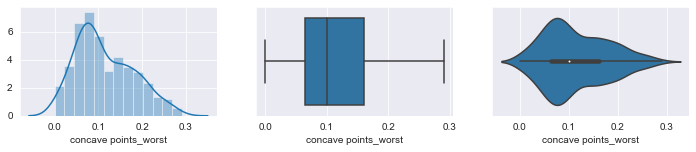

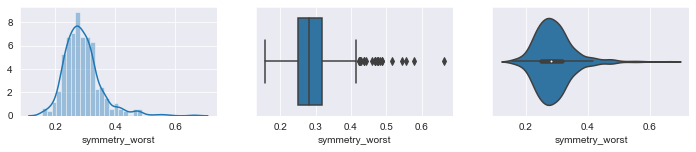

In [20]:
def plot_single_feature(df, col):
    fig, axs = plt.subplots(1,3, figsize=(12,2))
    sns.distplot(df[col], ax=axs[0])
    sns.boxplot(df[col], ax=axs[1])
    sns.violinplot(df[col], ax=axs[2])
    plt.show()
    

for col in df.dtypes.index[2:-1]:
    plot_single_feature(df, col)
    

**Note:** From the distribution of the features, it can be seen that there are many data falling out of the 75% quartile. Some of them appears to be outliers, however, they are still in a reasonal range and could be real data that is important to cancer prediction.  Therefore, it was decided not to remove them.

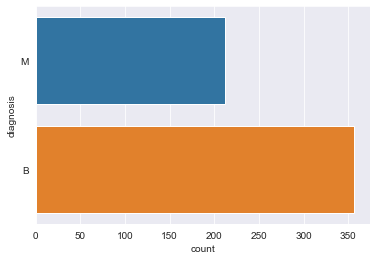

In [21]:
sns.countplot(y='diagnosis', data=df)
plt.show()

### Feature Relationships (Segmentations & Correlations)
- Have you segmented key categorical features and/or the target variable?
- What have you learned about the relationships between your features?
- Are there any surprising correlations (or non-correlations)?
- Have you visualized your correlation matrix for easier reference?
- Do you anticipate any helpful new features to engineer?

('radius_mean', 'radius_se', 'radius_worst')


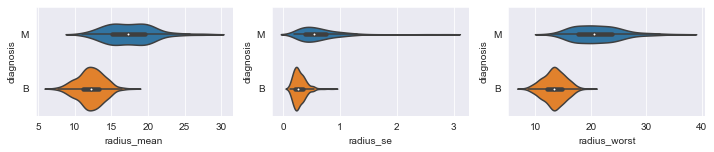

('texture_mean', 'texture_se', 'texture_worst')


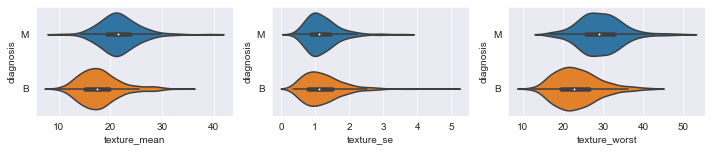

('perimeter_mean', 'perimeter_se', 'perimeter_worst')


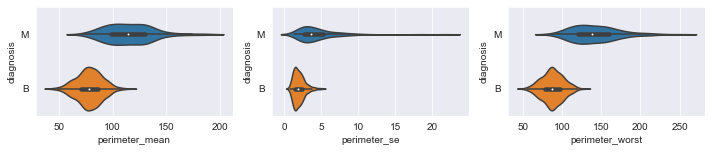

('area_mean', 'area_se', 'area_worst')


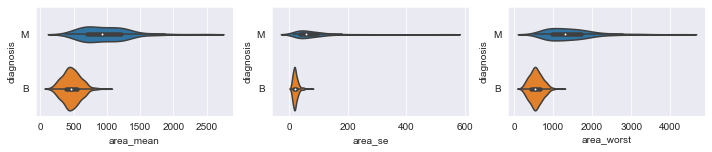

('smoothness_mean', 'smoothness_se', 'smoothness_worst')


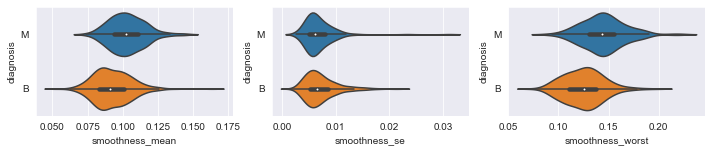

('compactness_mean', 'compactness_se', 'compactness_worst')


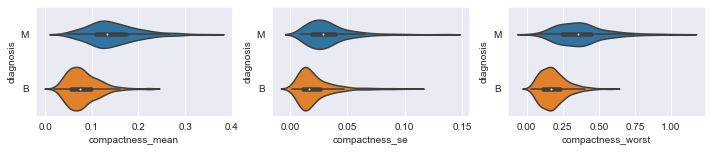

('concavity_mean', 'concavity_se', 'concavity_worst')


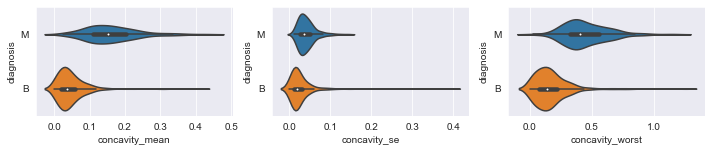

('concave points_mean', 'concave points_se', 'concave points_worst')


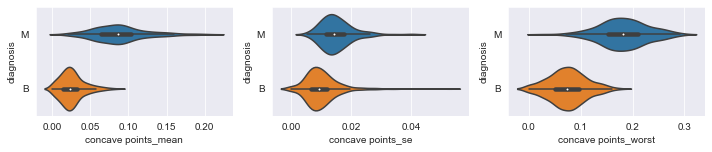

('symmetry_mean', 'symmetry_se', 'symmetry_worst')


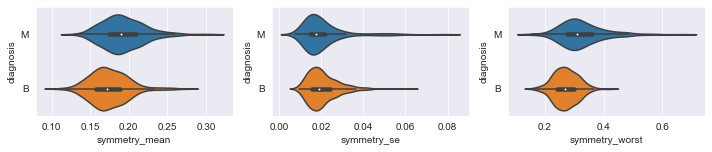

('fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst')


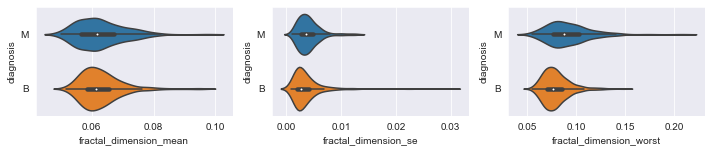

In [22]:
def plot_segmentation(df, col, target):
    fig, axs = plt.subplots(1, 3, figsize=(12,2))
    sns.violinplot(x=col[0], y=target, data=df, ax=axs[0])
    sns.violinplot(x=col[1], y=target, data=df, ax=axs[1])
    sns.violinplot(x=col[2], y=target, data=df, ax=axs[2])
    plt.show()
    
for col in zip(df.dtypes.index[2:2+10], df.dtypes.index[12:12+10], df.dtypes.index[22:22+10]):
    print(col)
    plot_segmentation(df, col, target='diagnosis')

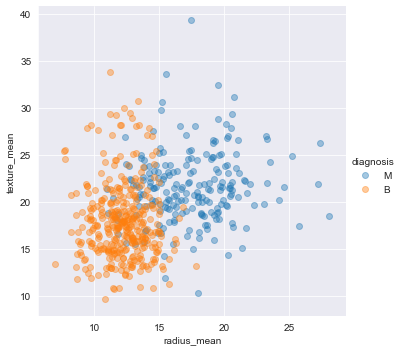

In [23]:
sns.lmplot(x='radius_mean',
           y='texture_mean',
           hue='diagnosis',
           data=df,
           fit_reg=False, 
           scatter_kws={'alpha':0.4}
          )
plt.show()

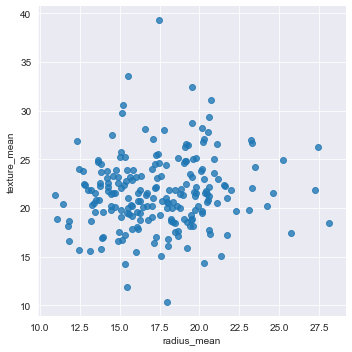

In [24]:
sns.lmplot(x='radius_mean',
           y='texture_mean',
           data=df[df.diagnosis=='M'],
           fit_reg=False, 
          )
plt.show()

In [25]:
df.groupby('diagnosis').agg(['mean'])

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,2.654e+07,12.147,17.915,78.075,462.790,0.092,0.080,0.046,0.026,0.174,0.063,0.284,1.220,2.000,21.135,0.007,0.021,0.026,0.010,0.021,0.004,13.380,23.515,87.006,558.899,0.125,0.183,0.166,0.074,0.270,0.079
M,3.682e+07,17.463,21.605,115.365,978.376,0.103,0.145,0.161,0.088,0.193,0.063,0.609,1.211,4.324,72.672,0.007,0.032,0.042,0.015,0.020,0.004,21.135,29.318,141.370,1422.286,0.145,0.375,0.451,0.182,0.323,0.092


In [26]:
df['diagnosis'] = pd.get_dummies(df.diagnosis).M
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.40,0.006,0.049,0.054,0.016,0.030,0.006,25.38,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.08,0.005,0.013,0.019,0.013,0.014,0.004,24.99,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,1,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.03,0.006,0.040,0.038,0.021,0.022,0.005,23.57,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,1,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.23,0.009,0.075,0.057,0.019,0.060,0.009,14.91,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,1,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.44,0.011,0.025,0.057,0.019,0.018,0.005,22.54,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077


In [69]:
df.drop('id', 1, inplace=True)

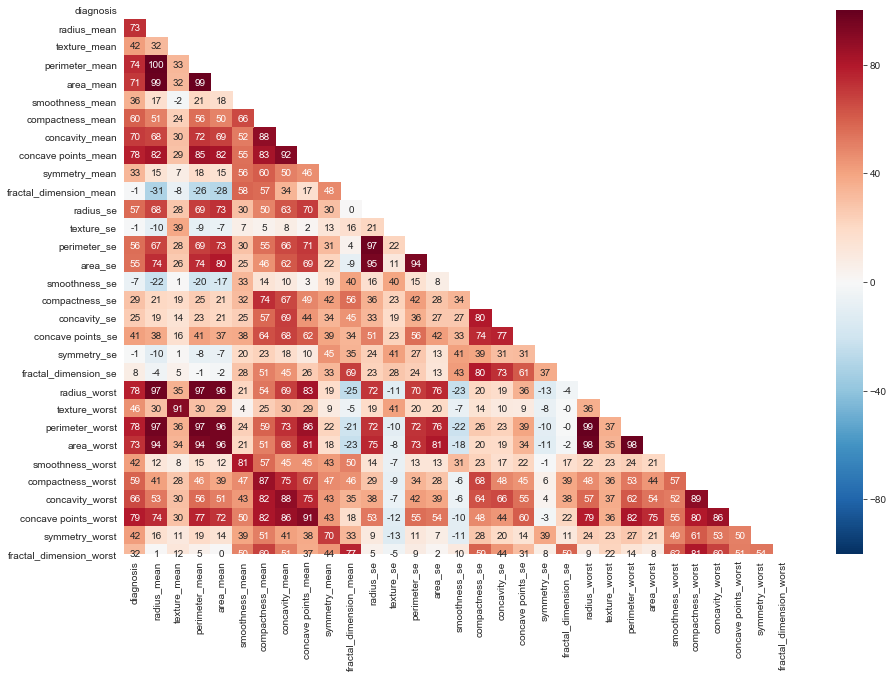

In [84]:
correlations = df.corr() * 100
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1
sns.set_style('white')
plt.figure(figsize=(15,10))
sns.heatmap(correlations, 
            cmap='RdBu_r', 
            annot=True, 
            fmt='0.0f', 
            mask=mask,
            vmin=-100,
            vmax=100)
plt.show()

In [104]:
correlations['diagnosis'].sort_values(ascending=True)

smoothness_se             -6.702  
fractal_dimension_mean    -1.284  
texture_se                -0.830  
symmetry_se               -0.652  
fractal_dimension_se       7.797  
concavity_se               25.373 
compactness_se             29.300 
fractal_dimension_worst    32.387 
symmetry_mean              33.050 
smoothness_mean            35.856 
concave points_se          40.804 
texture_mean               41.519 
symmetry_worst             41.629 
smoothness_worst           42.146 
texture_worst              45.690 
area_se                    54.824 
perimeter_se               55.614 
radius_se                  56.713 
compactness_worst          59.100 
compactness_mean           59.653 
concavity_worst            65.961 
concavity_mean             69.636 
area_mean                  70.898 
radius_mean                73.003 
area_worst                 73.383 
perimeter_mean             74.264 
radius_worst               77.645 
concave points_mean        77.661 
perimeter_worst     

**Note:** Feature relations are studied using violin plot and correlation heat map. Features that have little relavence to diagnosis were identified.  "id" column is not relavent to cancer prediction, therefore is removed.

<!-- <div class="alert alert-block alert-info"> -->
  
### Summary
    
1. "Unnamed: 32" column is empty and shall be removed.    
1. "id" shall be removed because it is not a relational feature.
1. There are data that looks like outliers from distribution, but not sure if they are reasonable data. Consider to keep them for now. 
1. Change "diagnoisis" to numeric.
1. Remove features that have correlation less than 50% with diagnosis
<!-- </div> -->

## Data Cleaning

Remember, proper data cleaning can make or break your project. Better data > fancier algorithms. Review the Cornerstone Projects if you need a refresher on the code.

### Unwanted Observations
- Have you dropped duplicate observations?
- Have you dropped irrelevant observations?

In [110]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)
df.drop('Unnamed: 32', 1, inplace=True )
df.drop('id', 1, inplace=True)
df['diagnosis'] = pd.get_dummies(df.diagnosis).M

correlations = df.corr() * 100
corr = correlations['diagnosis'].sort_values(ascending=True)

df.drop(corr[corr.values <= 33].index, axis=1, inplace=True)

df.shape

(569, 23)

### Structural Errors
- Are there any features that should be encoded as binary indicator variables?
- Have you fixed typos and inconsistent capitalization in your categorical features?
- Are there any classes in your categorical features that refer to the same thing? ( e.g. “N/A” and “Not Applicable” appearing as two different classes )

No structural errors on data

### Outliers
- Have you visually checked for any potential outliers to remove in your features?
- Do you have a good reason to remove each outlier? ( e.g. suspicious measurements, different population, different application )

Consider all the data are quality data.

### Missing Data
- Have you labeled missing values in categorical features?
- Have you flagged and filled missing values in numeric features?
- **Tip:** There are certain situations where dropping observations with missing values is appropriate, such as if you only care about predicting observations that have a given feature value. For example, you might only wish to predict housing prices for single-family homes, in which case you would simply drop any observations that weren’t for single-family homes (including those with missing values for property type).

No missing data in the data set.

### Summary

The data set are generally of good quality.  Data cleaning only involves dropping off some irrelavent features.  

## Feature Engineering

Feature engineering is one of the best ways data scientists can improve model
performance and add value into the applied machine learning process.

### Domain Knowledge
- Do you have prior expertise in your chosen domain? If not, have you done sufficient reading / research / preparation to understand it better?
- Do you know anyone else in your network who also has domain expertise?
- Based on your knowledge of the domain, are there any features you could engineer that would potentially improve the performance of your model?



### Heuristics
- Are there any interaction features you could create?
- Are there any indicator features you could create?
- Have you grouped sparse classes in your categorical features?
- Do you need to do any form of data wrangling, such as aggregating data (i.e. rolling it up)?
- Are there any ordinal categorical features you could encode as numeric?
- Are there any potentially useful outside datasets you could merge in?


### Preparing the ABT
- Have you created dummy variables for your categorical features?
- Have you dropped unused and/or redundant features? ( e.g. ID columns, features that wouldn’t be available, text descriptions and metadata, etc. )

In [111]:
df.to_csv('analytical_base_table.csv', index=None)

### Summary

The features included in the data set seem to be comprehensive. No additional features were engineered. The analytical base table was saved for futher machine learning tasks. 

## Algorithm Selection

For your Capstone Project, you’ve probably already imported the relevant algorithms at the start of the project, under the Library Imports section. Therefore, you should use this section to explain your choices and showcase your understanding.
- Why did you choose those algorithms?
- What are their practical benefits?
- What are the key hyperparameters to tune for your chosen algorithms?

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

import pickle

## Model Training

Once you’ve done the steps leading up to this one, model training should be straightforward and formulaic. Review the Cornerstone Projects if you need a  refresher on the code.
### Data Spending
- Have you split your dataset into separate training and test sets?
- Have you set a random seed for replicable results?
- Do you understand the purpose and use-case of cross-validation?

In [112]:
abt = pd.read_csv('analytical_base_table.csv')
y = abt.diagnosis
X = abt.drop('diagnosis', axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   stratify=abt.diagnosis)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 22)
(114, 22)
(455,)
(114,)


### Pre-Processing & Pipelines
- Have you set up your modeling pipelines with the proper preprocessing steps?
- Have you set random states for each algorithm to ensure replicable results?

In [58]:
piplelines = {'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
              'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
              'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
              'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
              'svm': make_pipeline(StandardScaler(), SVC(probability=True, random_state=123))
             
             }

In [59]:
piplelines['svm'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
       kernel='rbf', max_iter=-1, probability=True, random_state=123,
       shrinking=True, tol=0.001, verbose=False))],
 'verbose': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=True, random_state=123,
     shrinking=True, tol=0.001, verbose=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto_deprecated

### Hyperparameter Tuning
- Have you declared hyperparameter grids with reasonable hyperparameter values to try for each of your algorithms?
- Have you set up GridSearchCV objects for each of your algorithms to perform cross-validation and tune hyperparameters?
- Have you fit models using each of your algorithms?

In [60]:
l1_hyperparameters = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
                     }
l2_hyperparameters = {'logisticregression__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
                     }
rf_hyperparameters = {'randomforestclassifier__n_estimators': [100, 200],
                      'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33],
                      'randomforestclassifier__min_samples_leaf':[1, 3, 5, 10]
                     }
gb_hyperparameters = {'gradientboostingclassifier__n_estimators':[100, 200],
                      'gradientboostingclassifier__learning_rate':[0.05, 0.1, 0.2],
                      'gradientboostingclassifier__max_depth':[1, 3, 5]
                     }
svm_hyperparameters = {'svc__kernel': ['linear', 'rbf'],
                       'svc__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 
                       'svc__gamma': [1, 0.05, 0.01],
                      }

In [61]:
hyperparameters = {'l1': l1_hyperparameters,
                  'l2': l2_hyperparameters,
                   'rf': rf_hyperparameters,
                   'gb': gb_hyperparameters,
                   'svm': svm_hyperparameters,
        }

In [114]:
fitted_models = {}
for name, pipeline in piplelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
svm has been fitted.


### Winner Selection
- Which of your models had the best cross-validated score?
- Which of your models performs the best on the test set?
- Were you able to satisfy your win-condition for this project?
- Do you need to use any additional performance metrics to evaluate your model?

In [115]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.9758241758241758
l2 0.978021978021978
rf 0.9692307692307692
gb 0.967032967032967
svm 0.9824175824175824


In [116]:
for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    print(name, roc_auc_score(y_test, pred))

l1 0.9864417989417988
l2 0.986111111111111
rf 0.990079365079365
gb 0.9874338624338624
svm 0.9854497354497354


In [20]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

### Summary
Five classification ML algorithoms were evaluated using cross validation method. All five algorithms have higher than 0.96 cross-validated score.  Support vector machine has the best cross-validated score.  However random forest performs the best on the test set, with roc_auc_score of 0.99, which means that random forest classifier has a 99% chance of distinguishing between a positive class observation and a negative class one.  

## Insights & Analysis

Many people miss this crucial Insights & Analysis section. This comes at the end of your project, and it's really there to tie everything together. This is where you'd summarize your results, discuss your most important findings, and even explain how you would expand upon your project if you had more time and resources.
- What were your key findings and results?
- What was your winning model (if applicable)?
- What did you personally learn by completing this project?
- How would you expand upon or improve this project if you had more time and/or resources?
- Are there any additional datasets that you would wish to acquire?
- Were there any useful references that helped you complete your project? If so, you should add citations at the bottom.

In [22]:
with open('final_model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [23]:
clf

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

**Key Findings:**
1. The top five features that are most relevant to breast canser diagnosis are perimeter_mean (74.264), radius_worst (77.645), concave points_mean (77.661), perimeter_worst (78.291), concave points_worst (79.357). 
1. The five classificatioin algrithoms (LogisticRegression with L1 and L2 regularization, RandomForestClassifier, GradientBoostingClassifier, and SVC) all worked pretty well on the the breast cancer data set, with high AUROC scores.  RandomForest has the best AUROC score of 0.99, which means that this classifier has a 99% chance of distinguishing between a positive class observation and a negative class one.  


**And voilà!** Take your time, don’t rush, and make sure you’re all caught up. You may need to do a few more iterations or tweaks, but after completing these steps, you should now have a pretty kick-ass project that is UNIQUE to you… how awesome is that! 

In the next module, we’ll look at polishing it up a bit more, hosting it online, and adding it your own personal portfolio!